# Load All Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Load Electricity Cost

In [2]:
from glob import glob
import pandas as pd

electricity_cost_df = pd.DataFrame()
electricity_cost_data_paths = glob("../data/clean/2*.xls")
for electricity_cost_data_path in electricity_cost_data_paths:
    electricity_cost_df = pd.concat([pd.read_csv(electricity_cost_data_path), electricity_cost_df])
electricity_cost_df["Datetime"] = pd.to_datetime(electricity_cost_df["Datetime"], format="%d-%b-%y")

In [3]:
electricity_cost_df.sort_values("Datetime").head()

,Datetime,Settlement Period,Market Index Data Provider Id,Market Index Volume(MWh),Market Index Price(£/MWh),Volume * Price Product,start daily row,end daily row,daily volume * Price Product,Daily volume,volume weighted price
0,2011-01-01,48.0,APXMIDP,415.0,46.46,19280.90,2.0,49.0,1613523.0,33795.0,47.744
1,2011-01-02,48.0,APXMIDP,326.0,45.50,14833.00,50.0,97.0,1926510.0,34913.0,55.180
2,2011-01-03,48.0,APXMIDP,221.0,42.72,9441.12,98.0,145.0,1631767.0,32858.5,49.660
3,2011-01-04,48.0,APXMIDP,115.5,41.18,4756.29,146.0,193.0,1887767.0,35356.5,53.390
4,2011-01-05,48.0,APXMIDP,250.5,38.04,9529.02,194.0,241.0,1219950.0,25136.0,48.530


### Load Energy Usage

In [4]:
energy_df = pd.read_csv("../data/clean/LondonEnergy.xls")
energy_df["Date"] = pd.to_datetime(energy_df["Date"], format="%m/%d/%Y")
total_starting_rows = len(energy_df.index)
energy_df.sort_values("Date").head()

,LCLid,Date,KWH
113774,MAC000152,2011-11-23,5.969
109206,MAC000146,2011-11-23,5.619
112116,MAC000150,2011-11-23,9.254
115432,MAC000154,2011-11-23,5.798
108377,MAC000145,2011-11-23,8.952


### Load Weather Data

In [5]:
weather_df = pd.read_csv("../data/clean/LondonWeather.xls")
weather_df["date"] = pd.to_datetime(weather_df["date"], format="%Y%m%d")
weather_df.sort_values("date").head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Merge Datasets

In [6]:
merged_df = pd.merge(energy_df, electricity_cost_df, left_on="Date", right_on="Datetime")
merged_df = pd.merge(merged_df, weather_df, left_on="Date", right_on="date")
print(merged_df.columns)
merged_df.head()

Index(['LCLid', 'Date', 'KWH', 'Datetime', 'Settlement Period',
       'Market Index Data Provider Id', 'Market Index Volume(MWh)',
       'Market Index Price(£/MWh)', 'Volume * Price Product',
       'start daily row', 'end daily row', 'daily volume * Price Product',
       'Daily volume', 'volume weighted price', 'date', 'cloud_cover',
       'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'precipitation', 'pressure', 'snow_depth'],
      dtype='object')


,LCLid,Date,KWH,Datetime,Settlement Period,Market Index Data Provider Id,Market Index Volume(MWh),Market Index Price(£/MWh),Volume * Price Product,start daily row,...,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,MAC000002,2012-10-12,7.098,2012-10-12,48.0,N2EXMIDP,0.0,0.0,0.0,27358.0,...,2012-10-12,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
1,MAC000003,2012-10-12,13.434,2012-10-12,48.0,N2EXMIDP,0.0,0.0,0.0,27358.0,...,2012-10-12,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
2,MAC000004,2012-10-12,1.522,2012-10-12,48.0,N2EXMIDP,0.0,0.0,0.0,27358.0,...,2012-10-12,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
3,MAC000005,2012-10-12,4.448,2012-10-12,48.0,N2EXMIDP,0.0,0.0,0.0,27358.0,...,2012-10-12,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
4,MAC000006,2012-10-12,4.074,2012-10-12,48.0,N2EXMIDP,0.0,0.0,0.0,27358.0,...,2012-10-12,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0


In [7]:
assert(len(merged_df.index) == total_starting_rows) # Assert we didn't lose any data

In [8]:
# Drop redundant date columns
merged_df = merged_df.drop(["Datetime", "date"], axis=1)

# Test Train Split
For the test train split on time series data, we will use a rolling k fold

https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection
```
Split 1: Test [1] Train [2]
Split 2: Test [1, 2] Train [3]
Split 3: Test [1, 2, 3] Train [4]
Split 4: Test [1, 2, 3, 4] Train [5]
Split 5: Test [1, 2, 3, 4, 5] Train [6]
```

In [9]:
import numpy as np

first_date = merged_df["Date"].min()
merged_df['DateIndex'] = merged_df["Date"].apply(lambda x: (x- first_date).days).astype(int)
merged_df = merged_df.reindex(np.arange(len(merged_df.index)))
merged_df = merged_df.sort_values("DateIndex")
merged_df.head()

,LCLid,Date,KWH,Settlement Period,Market Index Data Provider Id,Market Index Volume(MWh),Market Index Price(£/MWh),Volume * Price Product,start daily row,end daily row,...,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,DateIndex
1047702,MAC000156,2011-11-23,6.523,48.0,N2EXMIDP,0.0,0.0,0.0,26788.0,26883.0,...,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047703,MAC000157,2011-11-23,7.408,48.0,N2EXMIDP,0.0,0.0,0.0,26788.0,26883.0,...,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047701,MAC000155,2011-11-23,9.281,48.0,N2EXMIDP,0.0,0.0,0.0,26788.0,26883.0,...,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047700,MAC000154,2011-11-23,5.798,48.0,N2EXMIDP,0.0,0.0,0.0,26788.0,26883.0,...,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047699,MAC000153,2011-11-23,21.702,48.0,N2EXMIDP,0.0,0.0,0.0,26788.0,26883.0,...,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0


<Axes: title={'center': 'Data Distrubtion by Date'}, xlabel='Date', ylabel='Count'>

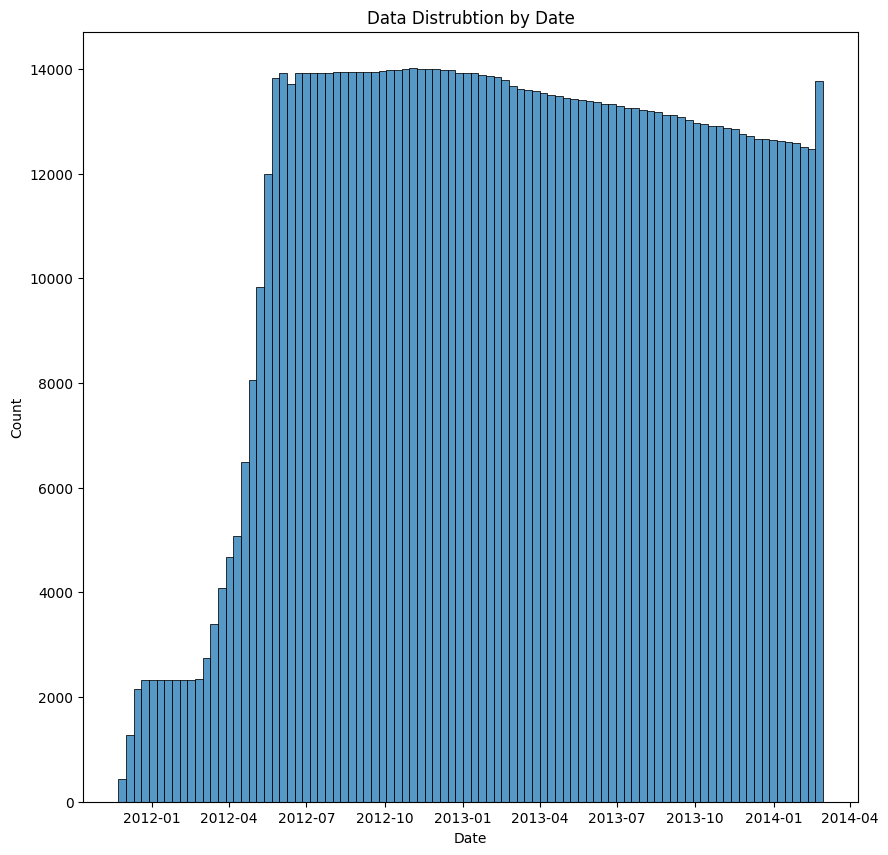

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Data Distrubtion by Date")
sns.histplot(merged_df["Date"], bins=92)

In [11]:
# Split Data into 6 even segments.
SPLIT_COUNT = 6

splits = []
date_indexes = merged_df["DateIndex"]
data_length = len(date_indexes)
for i in range(SPLIT_COUNT):
    split = date_indexes[int(i * data_length / SPLIT_COUNT):int((i+1) * data_length / SPLIT_COUNT)]
    splits.append((split.min(), split.max()))
    if i != 0:
        if splits[i][0] == splits[i-1][1]:
            splits[i] = (splits[i][0] + 1, splits[i][1])

splits

[(0, 242), (243, 354), (355, 467), (468, 584), (585, 704), (705, 828)]

In [12]:
merged_df["split"] = -1
for i, split in enumerate(splits):
    print(f"Split {i} has length: {len(merged_df[(merged_df['DateIndex'] >= split[0]) & (merged_df['DateIndex'] <= split[1])].index )}")
    merged_df.loc[(merged_df["DateIndex"] >= split[0]) & (merged_df["DateIndex"] <= split[1]), "split"] = i

Split 0 has length: 176003
Split 1 has length: 173755
Split 2 has length: 174567
Split 3 has length: 175042
Split 4 has length: 174849
Split 5 has length: 174359


<Axes: title={'center': '6 Folds for Test Train Split'}, xlabel='DateIndex', ylabel='Count'>

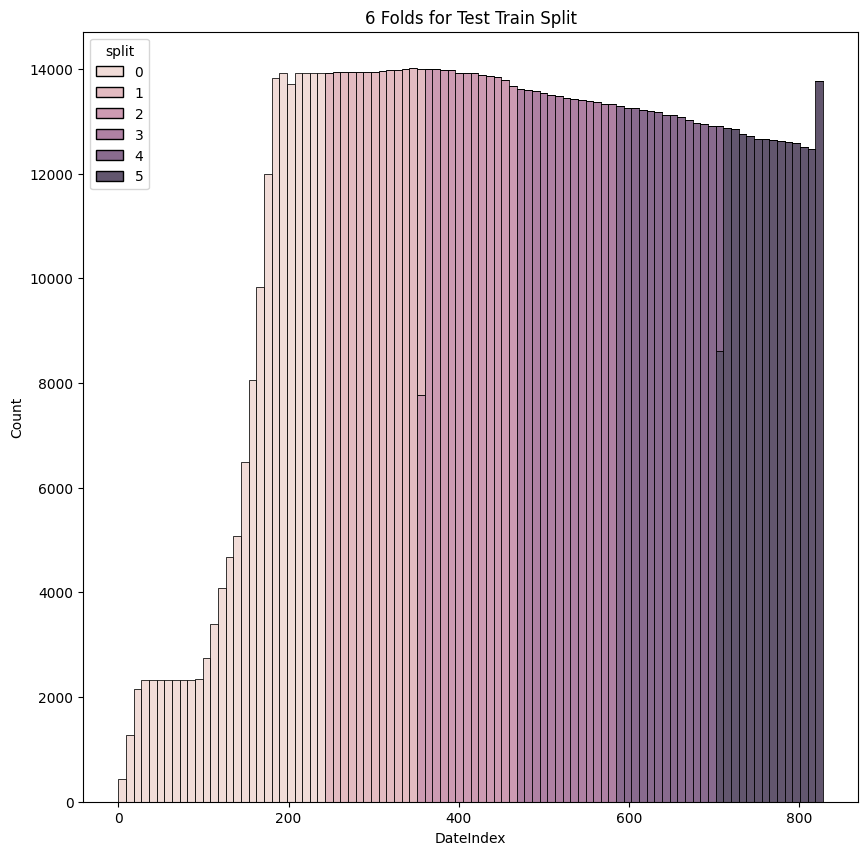

In [13]:
plt.figure(figsize=(10,10))
plt.title("6 Folds for Test Train Split")
sns.histplot(data=merged_df, x="DateIndex", hue="split", multiple="stack", bins=92)

In [14]:
for i in range(len(splits) - 1):
    train_df = merged_df[merged_df["split"] <= i]
    print(f"Train {i} has length {len(train_df.index)}")
    train_df.to_csv(f"../data/test_train_split/train_{i}.csv")

    test_df = merged_df[merged_df["split"] == i+1]
    print(f"Test {i} has length {len(test_df.index)}")
    test_df.to_csv(f"../data/test_train_split/test_{i}.csv")

Train 0 has length 176003
Test 0 has length 173755
Train 1 has length 349758
Test 1 has length 174567
Train 2 has length 524325
Test 2 has length 175042
Train 3 has length 699367
Test 3 has length 174849
Train 4 has length 874216
Test 4 has length 174359
